In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk

In [2]:
df=pd.read_csv('Resume_Data.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [4]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...


In [6]:
#getting the entire resume text


In [6]:
text=' '.join(df.Cleaned_Resume)

In [8]:
text[1000:2500]

'rance  TECHNOLOGY ASSISTED REVIEW  TAR  Technolog  A i ted Review  a i t  in a elerating the review proce  and run anal tic  and generate report      Core member of a team helped in developing automated review platform tool from  cratch for a i ting E di cover  domain  thi  tool implement  predictive coding and topic modelling b  automating review   re ulting in reduced labor co t  and time  pent during the law er  review     Under tand the end to end flow of the  olution  doing re earch and development for cla ification model   predictive anal  i  and mining of the information pre ent in text data  Worked on anal  ing the output  and preci ion monitoring for the entire tool     TAR a i t  in predictive coding  topic modelling from the evidence b  following EY  tandard   Developed the cla ifier model  in order to identif   red flag   and fraud related i ue      Tool    Technologie   P thon   cikit learn  tfidf  word2vec  doc2vec  co ine  imilarit   Na  ve Ba e   LDA  NMF for topic mod

In [13]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

17910

In [14]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [15]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [16]:
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [17]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 0
Number of words not Lemmatized= 1832


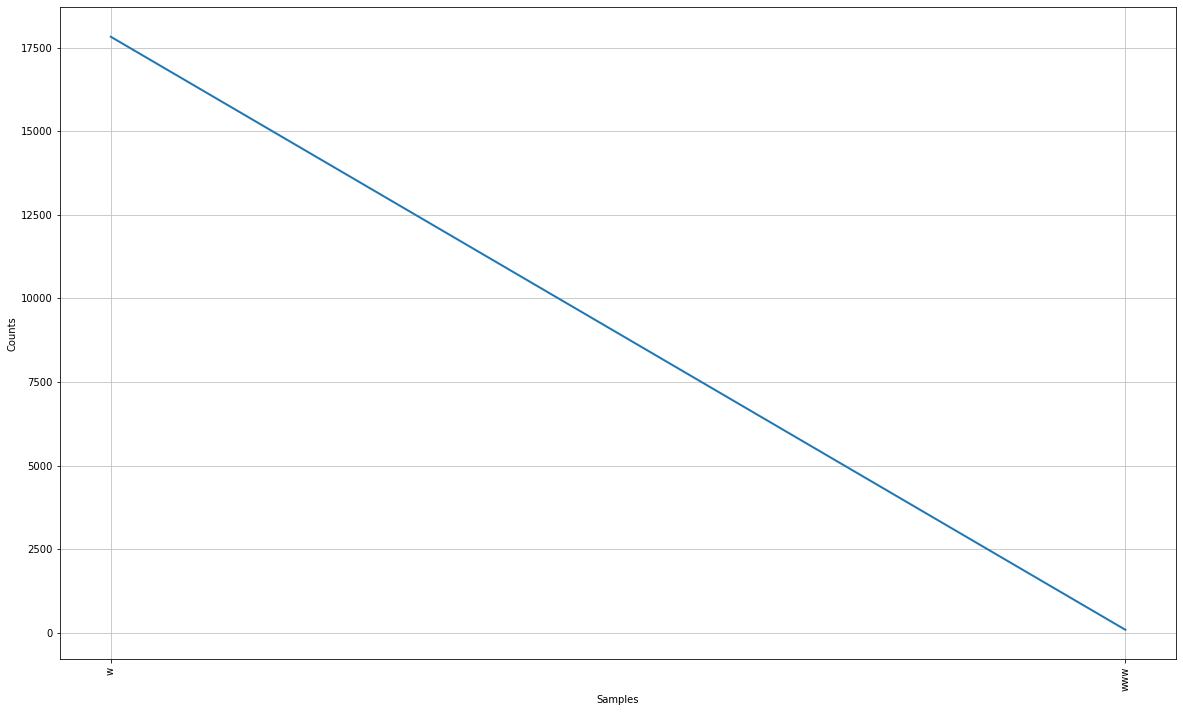

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)